-----------------------------------
### Predict sales based on advertising spend data

---------------------------------


#### problem statements

- Our initial objective is to establish whether a `correlation` exists between the `allocated advertising budget and sales figures`. If the evidence of such a connection is feeble, one could argue against investing funds in advertising campaigns.

- Assuming a link between advertising expenditure and sales holds true, we are interested in gauging the `intensity of this correlation`. To what extent does awareness of the advertising budget contribute to insights about product sales?

- Do sales show an affiliation with all three forms of media—TV, radio, and newspaper—or is the association confined to only one or two of these media? To address this query, we need a method to disentangle the unique impact of each medium on sales when resources are allocated to all three.

- What magnitude of sales increment can be expected with each unit of advertising expenditure in a specific medium? How accurate can we anticipate this incremental value?

- How precise are our predictions regarding future sales, given specific levels of television, radio, or newspaper advertising? What is the degree of accuracy associated with these projections?

- Does the correlation adhere to a linear pattern? If the relationship between advertising spending across diverse media and sales is approximately linear, linear regression would be a suitable analytical approach. If not, there might be potential to transform either the predictor or the response variable, allowing for the application of linear regression.

- Could combining resources, such as allocating $50,000 each for television and radio advertising, result in higher sales compared to investing $100,000 in either television or radio alone? In marketing, this phenomenon is recognized as a synergy effect, while statisticians refer to it as an interaction effect.

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn import metrics

#### load data

In [2]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/Advertising.csv"

In [3]:
# load the training data from glass data set
df_training = pd.read_csv(location)

df_training.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df_training.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# check the shape of the DataFrame (rows, columns)
df_training.shape

(200, 4)

#### data exploration

In [6]:
df_training.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


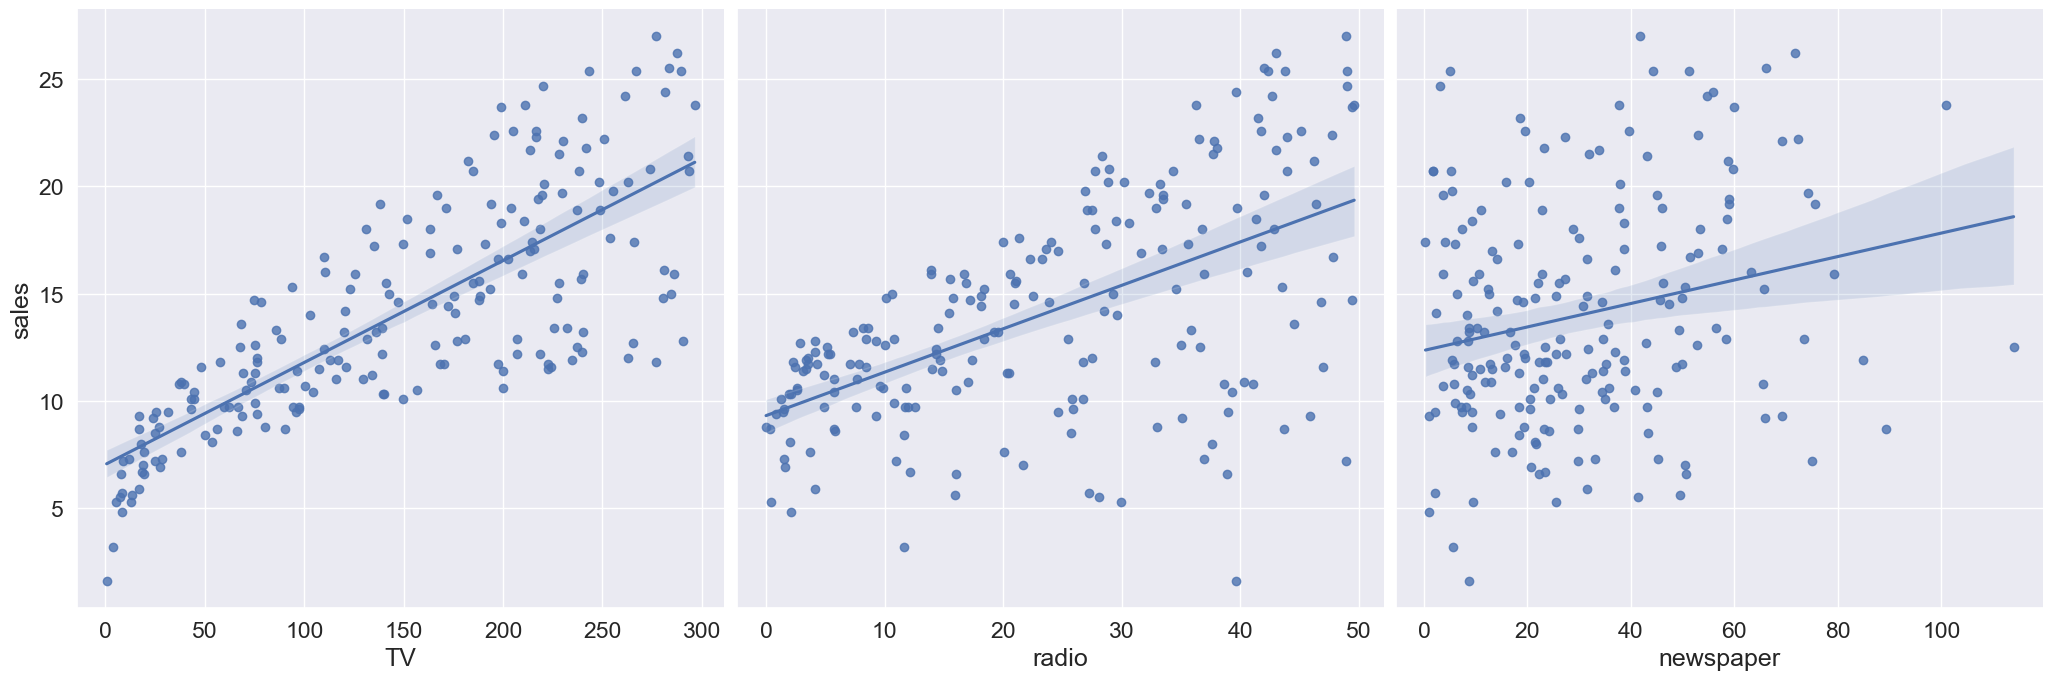

In [7]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_training, 
             x_vars=['TV','radio','newspaper'], 
             y_vars='sales', 
             height=7, 
             aspect=1, 
             kind='reg');

In [8]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training['sales']

In [9]:
# observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and 
# then betweeb sales and radio i.e. 0.576.

# correlations can vary from -1 to +1. 
# Closer to +1 means strong positive correlation and close -1 means strong negative correlation. 
# Closer to 0 means not very strongly correlated. 

# variables with strong correlations are mostly probably candidates for model builing.**
df_training.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


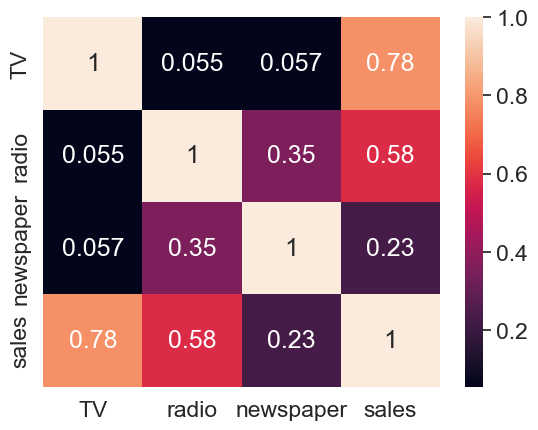

In [10]:
sns.heatmap( df_training.corr(), annot=True );

In [15]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [16]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


#### model build

In [17]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# fit the model to the training data (learn the coefficients)
#linreg_sm = smdl.OLS(y_train, X_train).fit()

LinearRegression()

In [18]:
# return beta coeff
linreg.coef_, linreg.intercept_

(array([0.04695205, 0.17658644, 0.00185115]), 2.937215734690609)

In [19]:
linreg.predict([[100, 12, 5]])

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.7607135])

#### model evaluation

In [22]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# predict using sm
#y_pred_sm = linreg.predict(X_test)

In [23]:
y_test[:5]

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64

In [18]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046952047768484634),
 ('radio', 0.1765864352681738),
 ('newspaper', 0.001851153318892268)]

In [39]:
# y = 2.93 + 0.0466 * TV + 0.176 * Radio + 0.0018 * Newspaper
# 0.0466 * TV - per unit increase in TV spend will lead to 4.66% increase in sales
# 0.179 * Radio -                                          17.9% 
# 0.00345 * Newspaper - ...............                    0.3 % ....

In [24]:
# Model evaluation metrics for regression
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  2.937215734690609
beta coefficients       :  [0.04695205 0.17658644 0.00185115]
Mean Abs Error   MAE    :  1.0548328405073317
Mean Sq  Error MSE      :  1.928924907466572
Root Mean Sq Error RMSE :  1.3888574107756966
MAPE                    :  8.545502795467277
MPE                     :  -0.12914002526075638
r2 value                :  0.9224605706201435


In [25]:
df_training.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Regression Metrics

- Response/output is estimated for any given input or set of inputs

- The difference between the actual value and the model's estimate a residual. 

- These residuals will play a significant role in judging the usefulness of a model.

- If the residuals are small, it implies that the model is a good estimator

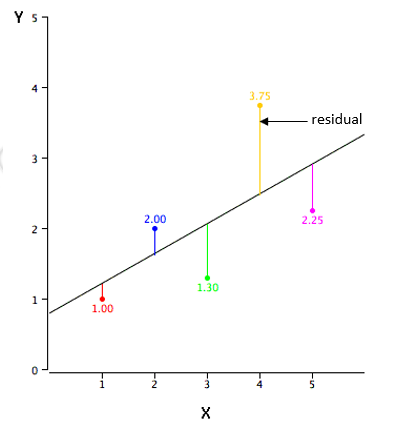

The various metrics used to evaluate the results of regression are :

    Mean-Absolute-Error(MAE).
    Mean Squared Error(MSE)
    Root-Mean-Squared-Error(RMSE).
    Mean Absolute Percentage Error (MAPE)
    Mean Percentage Error (MPE)
    R² or Coefficient of Determination.
    Adjusted R²

##### 1. Mean-Absolute-Error(MAE)

- Calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. 

- Take the average of all these residuals. 

- Effectively, MAE describes the typical magnitude of the residuals. 

- The MAE is also the most intuitive of the metrics 

- Each residual contributes proportionally to the total amount of error, meaning that larger errors will contribute linearly to the overall error.

- A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. 

- A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen).


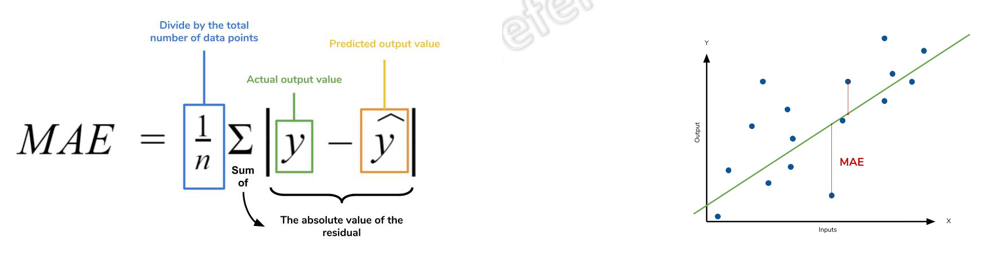

##### 2. Mean square error (MSE)

- The mean square error (MSE) is just like the MAE but squares the difference before summing them all instead of using the absolute value. 

- Because we are squaring the difference, the MSE will almost always be bigger than the MAE. For this reason, we cannot directly compare the MAE to the MSE. 

- The effect of the square term in the MSE equation is most apparent with the __presence of outliers__ in our data. 

- Each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. 

- Outliers in our data will contribute to much higher total error in the MSE than they would the MAE. 

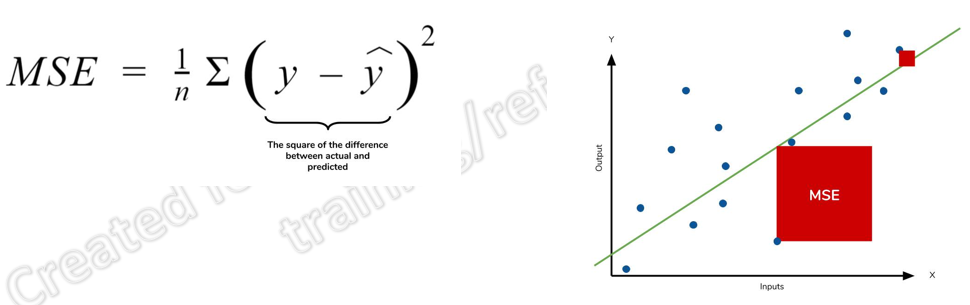




##### 3. Root mean squared error (RMSE) 

- Square root of the MSE

- Since the MSE and RMSE both square the residual, they are similarly affected by outliers. 

- The RMSE is analogous to the standard deviation (MSE to variance) 

- Is a measure of how large your residuals are spread out.


##### 4. Mean absolute percentage error (MAPE)

- The mean absolute percentage error (MAPE) is the percentage equivalent of MAE. 

- The equation looks just like that of MAE, but with adjustments to convert everything into percentages.

- Both MAPE and MAE are robust to the effects of outliers

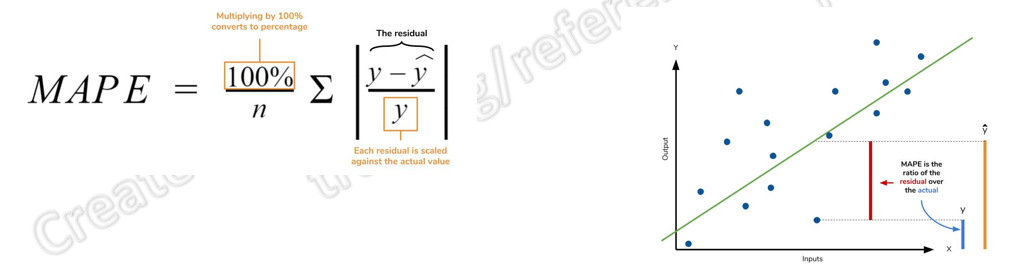

__Important points__

- MAPE's weaknesses actually stem from use of division operation. 

- MAPE is undefined for data points where the value is 0. 

- Similarly, the MAPE can grow unexpectedly large if the actual values are exceptionally small themselves. 

- Finally, the MAPE is biased towards predictions that are systematically less than the actual values themselves. That is to say, MAPE will be lower when the prediction is lower than the actual compared to a prediction that is higher by the same amount. 

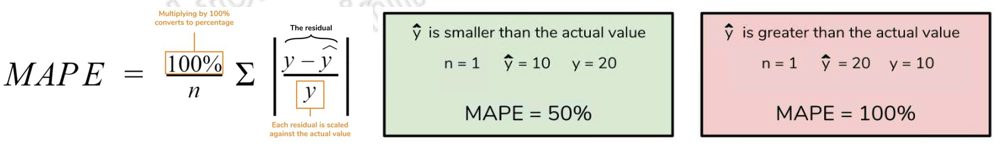



##### 5. Mean percentage error (MPE)

- The mean percentage error (MPE) equation is exactly like that of MAPE. 

- The only difference is that it lacks the absolute value operation.

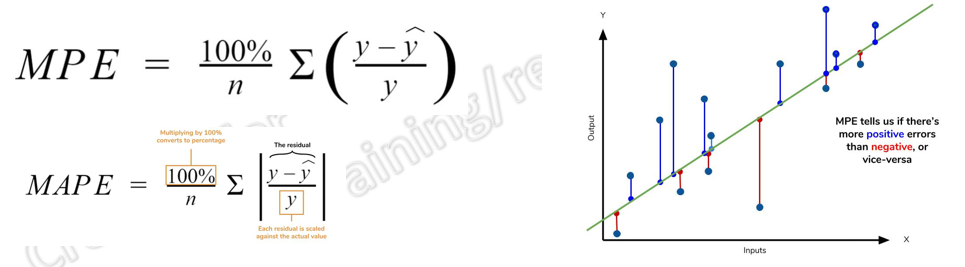


- Since positive and negative errors will cancel out, we cannot make any statements about how well the model predictions perform overall. 

- However, if there are more negative or positive errors, this bias will show up in the MPE. 

- Unlike MAE and MAPE, MPE is useful to us because it allows us to see if our model systematically underestimates (more negative error) or overestimates (positive error).

Model
- series of test runs
    - t1 - +MPE
    - t2 - +MPE
    - t3 - +MPE

##### $R^2$ 

- is a statistical measure of how close the data are to the fitted regression line.
- R-square signifies percentage of variations in the reponse variable that can be explained by the model.
- R-squared = Explained variation / Total variation
- Total variation is variation of response variable around it's mean.

The closer the r-square to 100%, the better is the model.


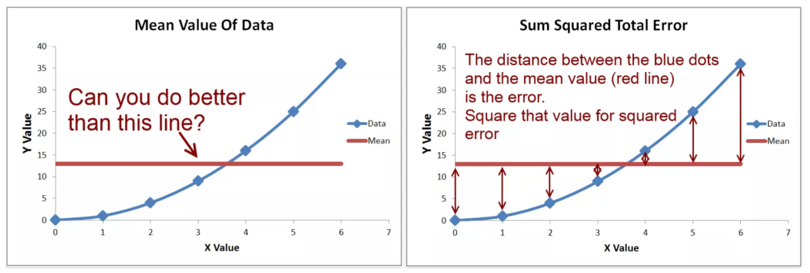

__intuitive understanding__  of baseline MSE 
- can be thought of as the MSE that the __simplest__ possible model would get.
- The simplest possible model would be to always predict the average of all samples
- First calculate how much error you would have if you don’t even try to do regression, and instead just __guess the mean__ of all the values.  
- That is the total error. This results in summed squared error (SST)

$$ \Big \Downarrow MSE(baseline) = SST = \frac{1}{N}\sum_{i=1}^{n}(y - \bar{y})^2 $$

#### Regression model 

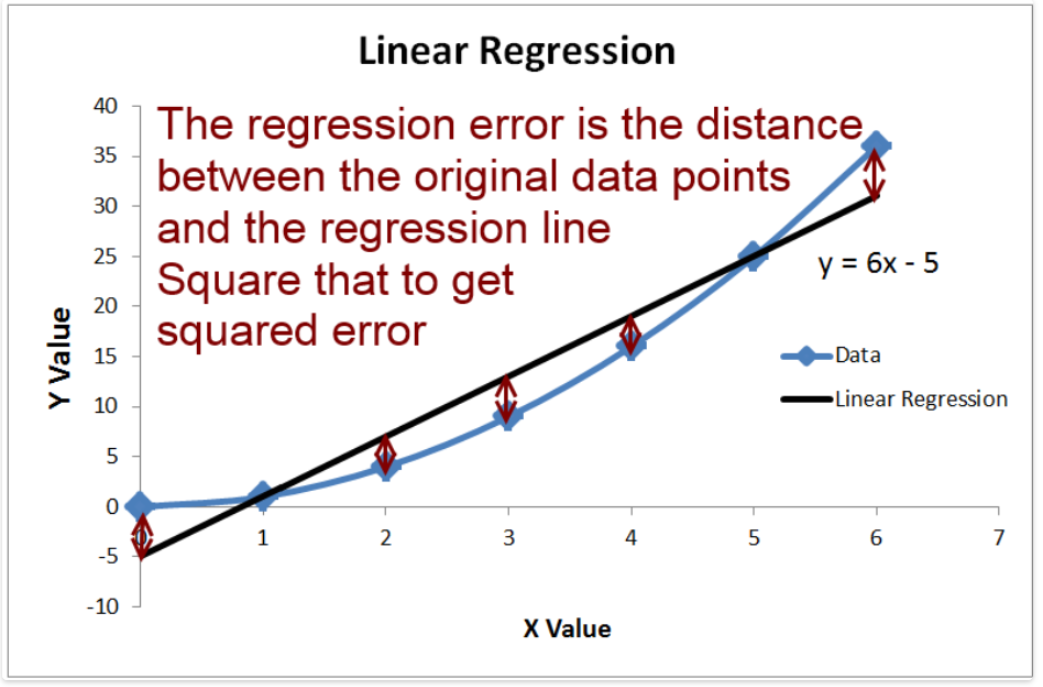

$$ \Big \Downarrow MSE(Model)    = SSE = \sum_{i=1}^{n}(y - \hat{y})^2 $$

#### Definition of R² 

- The ratio of the __regression error__ against the __total error__ tells how much of the total error remains in your regression model.  

- Subtracting that ratio from 1.0 gives how much error you removed using the regression analysis. 
- That is R2 !!!

- is the ratio between how good our model is vs how good is the naive mean model.
- R² gives an idea of how many data points fall within the line of the regression equation

$$ R^2 = 1 - \frac{SSE}{SST} $$

$$ R^2 = 1 - (Explained Variation / Total Variation) $$

__e.g.__

say SST = 50 and SSE = 40

so $\frac{SSE}{SST} = 40/ 50 = 0.8 $

this means 80% of the variation of y exists in the residuals. (in the model) i.e not explained by the variation of the predictor(s)

So $R^2 = 1 - 0.8 = 0.2 $


#### Example
In investing, R-squared is generally considered the percentage of a fund or security's movements (y) that can be explained by movements in a benchmark index (X, predictor).

For example, an R-squared for a fixed-income security versus a bond index identifies the security's proportion of price movement that is predictable based on a price movement of the index. 

The same can be applied to a stock versus the BSE/NSE index, or any other relevant index.

- 92% it fits the model
- mean 92% of variation in y is explained by Xs
- it predict 92% correctly 
- 8% it can not explain
- strength of relationship between inde. and depn variables 


#### Range of values for $R^2$

- The maximum value of R² is 1 but minimum can be minus infinity.
- $R^2$ is not truly limited to a lower bound of zero.  We can get a negative $R^2$ value.
- For example, consider a really crappy model predicting highly negative value for all the observations even though y_actual is positive. In this case, R² will be less than 0. This is a __highly unlikely__ scenario but the possibility still exists.

__What Does A Negative R Squared Value Mean?__
- For practical purposes, the lowest $R^2$ you can get is 0, but only because the assumption is that if your regression line cannot be worse than the mean.  
- However if the  regression line is worse than using the mean value, the $R^2$ value that you calculate will be negative.

- __IMP__ : The assertion that the $R^2$ has to be >= 0 is based on the assumption that if you get a negative R squared value, you will dump whatever regression calculation you are using and just go with the mean value!!!!

- The __take away__ for $R^2$ is

    - An R2 of 1.0 is the best. It means you have no error in your regression.
    - An R2 of 0 means your regression is no better than taking the mean value, i.e. you are not using any information from the other variables
    - A Negative R2 means you are doing worse than the mean value. 
        - Maybe summed squared error isn’t the metric that matters most in this case.  __
        - mean absolute error
        - MAPE
        - MPE

__worst case__ : Model is as good as the baseline
$$ SSE = SST $$
$$ R^2 = 1 - \frac{SSE}{SST} $$
$$ R^2 = 1 - 1  = 0 $$

__Best case__ : All data points fit the regression line
so 
$$ SSE = 0 $$
$$ R^2 = 1 - \frac{SSE}{SST} $$
$$ R^2 = 1 - 0  = 1 $$

#### Issues with R-squared
R-squared can be artificially made high. That is we can increase the value of R-squared by simply adding more and more independent variables to our model.

In other words R-squared never decreases upon adding more independent variables.

__why does this happen?__

$$ R^2 = 1 - \frac{SSE}{SST} $$

- R-squared will be maximum when SSE/SST will be minimum.

- In order for SSE/SST to be minimum SSE should be minimum.

    - Now SSE will decrease as we add more explanatory variables to our model. 
    - This is because as we add more explanatory variables to our regression model ,
    - our regression model will fit the data points better and hence sum of squared error will reduce.
    - Hence R-squared will increase even when the variable is not significant to our model.

##### 7. Adjusted R-squared
Adjusted R-squared simply penalizes the model for adding more useless variables.

$$ \Large {R_{adj}^2 = 1 - [\frac{(1-R^2)(n-1)}{n-k-1}]} $$ 

Where −

n = the number of points in your data sample.

k = the number of independent regressors, i.e. the number of variables in your model, excluding the constant.

In [42]:
# calculate the adjusted R2
num_cols = X_train.shape[1]
r2       = metrics.r2_score(y_test, y_pred)

adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)- num_cols - 1)

print('Adjustd R2 : ', adj_r2)

Adjustd R2 :  0.9183066726176512


#### Saving the model

In [52]:
import pickle

In [54]:
# Provide a filename for the saved model, e.g., "linear_regression_model.pkl"
model_filename = "linear_regression_model.pkl"

# Open the file in binary write mode and save the model using pickle.dump()
with open(model_filename, 'wb') as file:
    pickle.dump(linreg, file)


#### Load the Model Using pickle:

In [55]:
# Open the file in binary read mode and load the model using pickle.load()
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)


### Demo on R2 issue with increase in features

In [43]:
df_training.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [44]:
# add 20 columns, incrementally and check R2 at each step
r2_scores       = []
adj_r2_scores   = []

num_cols_to_add = 40

for iter in range(num_cols_to_add):
    
    new_col_name = 'X'+str(iter)
    df_training[new_col_name] = np.random.normal(1, 1, len(df_training))
    
    # use the list to select a subset of the original DataFrame
    X = df_training.drop(['sales'], axis = 1)

    # select a Series from the DataFrame
    y = df_training['sales']

    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

    # instantiate
    linreg = LinearRegression()

    # fit the model to the training data (learn the coefficients)
    linreg.fit(X, y)

    # make predictions on the testing set
    y_pred = linreg.predict(X_test)

    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # calculate the adjusted R2
    num_cols = X.shape[1]
    
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)- num_cols - 1)
    
    adj_r2_scores.append(adj_r2)

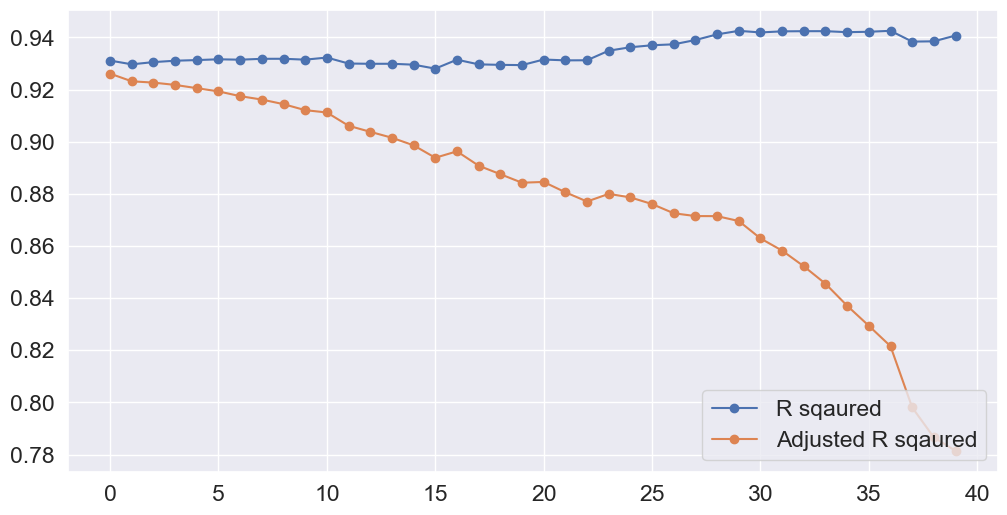

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(r2_scores,      marker='o', label='R sqaured')
plt.plot(adj_r2_scores,  marker='o', label='Adjusted R sqaured');

#plt.ylim(.5, 1)
plt.legend(loc="lower right");

### Example code for regression metrics

In [46]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [47]:
# Mean Absolute Error (MAE) 

# calculate MAE by hand
print((10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(true, pred))
print(metrics.mean_absolute_error(y_test, y_pred))

10.0
10.0
0.8872461901350018


In [48]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

150.0
1.4743810785741862


In [49]:
# Root Mean Squared Error (RMSE) 
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

12.24744871391589
1.2142409474952598


In [50]:
# Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.2142409474952598


In [51]:
# calculate r2 score
y_true_ex = [3, -0.5, 2, 7]
y_pred_ex = [2.5, 0.0, 2, 8]

print(metrics.r2_score(y_true_ex, y_pred_ex))

0.9486081370449679


In [ ]:
# calculate r2-score for our sales example
print(metrics.r2_score(y_test, y_pred))